# Selecting Master Sample for Virgo Filament Survey #

### Post ISSI 2019 ###

- Gianluca has made a master sample from Hyperleda
- In Bern, we were trying to reproduce the steps he took to:
    - cross-match with NSA, and 
    - remove spurious detections
- Gianluca matched according to NED name.
- RF is going to do the same thing but matching according to RA and DEC.

## Hyperleda Advantages ##

- has more redshift independent distances
- has more sources


## Arecibo Galaxy Catalog ##
- update on 16-Nov-2019
- both NSA and Hyperleda have problems with catalogs - some positions are off center, some galaxies are split into multiple parts
- it occurred to me that Martha has done a lot of the screening work already for the AGC. 
- going to plot AGC positions with NSA and Hyperleda to compare

## Questions ##
- why does NSA stop at dec = 0, when SDSS goes almost to -10 in that region
   - NSA is DR8

# Hyperleda #

Gianluca ran query in two regions
- region covered by Kim+2016
- extension region
- which do we want?

### Query Webpage ###

http://leda.univ-lyon1.fr/fullsql.html

### Hyperleda Query ###

```
select
objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
where de2000 > -35 and de2000 < 60 and al2000 < 16  and al2000 >
115./360.*24.  and v < 3300 and objtype='G'


```
### Hyperleda Extension Region Query ###
```
select objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
where ((de2000 >= 60 and de2000 < 75 and al2000 > 100./360.*24. and
al2000 < 280./360.*24.) or (de2000 > -35 and de2000 < 60 and al2000 >=
16. and al2000 < 280./360.*24.) or (de2000 > -35 and de2000 < 60
and al2000 > 100./360.*24. and al2000 <= 115./360.*24.)) and v < 3300
and objtype='G'


```


- chose separator as ,
- set null value to blank

- saved as hyperleda-finn-11Nov19.csv (even though its a cgi file)
- loaded in emacs and removed header info

In [3]:
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

from astropy.io import ascii, fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.visualization import simple_norm

from urllib.parse import urlencode
from urllib.request import urlretrieve
import IPython.display


In [4]:
# cosmology 
from astropy.cosmology import WMAP9 as cosmo


In [103]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
hfile = tablepath+'hyperleda-finn-11nov2019.csv'
ehfile = tablepath+'hyperleda-finn-11nov2019-extension.csv'
#hfile = tablepath+'fullsqlmean.csv'


In [104]:
hdat = ascii.read(hfile,delimiter=',',format='csv',header_start=0,data_start=1)
ehdat = ascii.read(ehfile,delimiter=',',format='csv',header_start=0,data_start=1)

## Sky Positions of Hyperleda Sources ##

Text(0, 0.5, 'DEC (deg)')

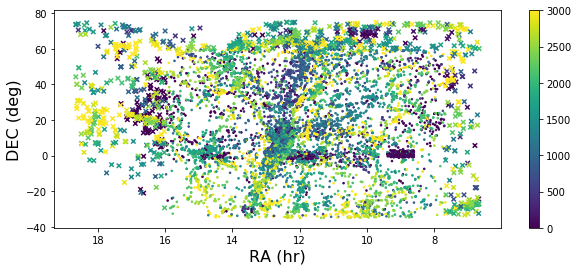

In [105]:
plt.figure(figsize=(10,4))
plt.scatter(hdat['al2000'],hdat['de2000'],c=hdat['vopt'],s=10,marker='.',vmin=0,vmax=3000)
# extended region
plt.scatter(ehdat['al2000'],ehdat['de2000'],c=ehdat['vopt'],s=20,marker='x',vmin=0,vmax=3000)
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

# Full Hyperleda Catalog #

Will query full region in one sql search

```
select
objname,objtype,de2000,al2000,v,e_v,vopt,e_vopt,vrad,e_vrad,bt,e_bt,type,bar,ring,multiple,compactness,t,e_t,logd25,e_logd25,logr25,e_logr25,pa,incl,logdc,btc,itc,ubtc,bvtc,m21c,hic,mabs,agnclass,kt,e_kt,it,e_it,ut,vt,mfir,e_ut,e_vt
where de2000 > -35 and de2000 < 75 and  al2000 < 280./360.*24.  and al2000 > 100./360.*24. and v < 3300 and objtype='G'


```

In [109]:
tablepath = '/Users/rfinn/github/Virgo/tables/'
fhfile = tablepath+'hyperleda-finn-11nov2019-full.csv'

In [110]:
fhdat = ascii.read(fhfile,delimiter=',',format='csv',header_start=0,data_start=1)

Text(0, 0.5, 'DEC (deg)')

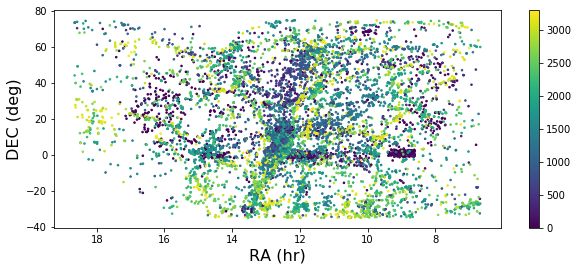

In [111]:
plt.figure(figsize=(10,4))
plt.scatter(fhdat['al2000'],fhdat['de2000'],c=fhdat['vopt'],s=10,marker='.',vmin=0,vmax=3300)
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

# Velocity Cut #

- We are using $v_r < 3300$ for the sample
- we should impose a low-z cutoff to avoid stars
- trying
$500 < v_r < 3300$

In [112]:
vflag = (fhdat['vopt'] > 500.) & (fhdat['de2000'] > -1.2)
print('total number in velocity cut = ',np.sum(vflag))

total number in velocity cut =  5690


Text(0, 0.5, 'DEC (deg)')

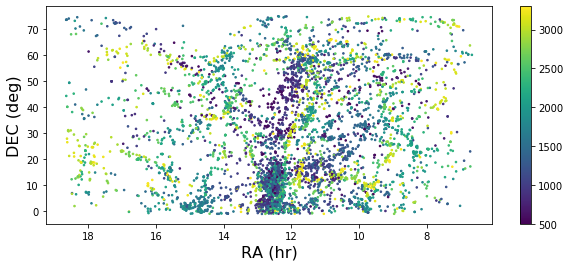

In [113]:

plt.figure(figsize=(10,4))
x = fhdat['al2000'][vflag]
y = fhdat['de2000'][vflag]
color = fhdat['vopt'][vflag]
plt.scatter(x,y,c=color,s=10,marker='.',vmin=500,vmax=3300)
plt.colorbar()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)

# Add Positions of CO Sample #
- read in CO file
- overplot positions of CO sample

In [114]:
cfile = tablepath+'CO-MasterFile-2018Feb16.fits'
codat = fits.getdata(cfile)

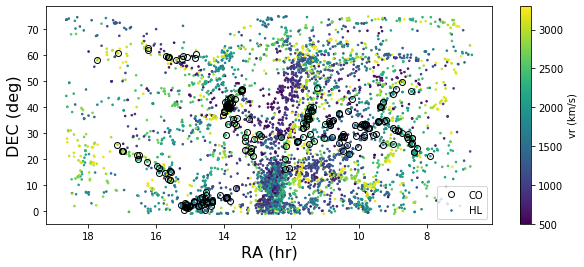

In [115]:
plt.figure(figsize=(10,4))
x = fhdat['al2000'][vflag]
y = fhdat['de2000'][vflag]
color = fhdat['vopt'][vflag]
plt.scatter(x,y,c=color,s=10,marker='.',vmin=500,vmax=3300,label='HL')

plt.plot(codat.RA/15.,codat.DEC,'ko',mfc='None',mec='k', label='CO')

plt.colorbar(label='vr (km/s)')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('../plots/hyperleda-CO.pdf')

# Match Hyperleda Catalog to NSA #

In [116]:
nsafile = '/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa = fits.getdata(nsafile)

In [117]:
decmin = -1.2 
decmax = 75 
ramax = 280.
ramin = 100. 
vmax = 3300.
vmin = 500.
nvflag = (nsa.Z*3.e5 > vmin) & (nsa.Z*3.e5 < vmax)
overlap = (nsa.RA > ramin) & (nsa.RA < ramax) & (nsa.DEC < decmax) & (nsa.DEC > decmin) & nvflag

In [118]:
nsasub = nsa[overlap]

In [119]:
len(nsasub)

5606

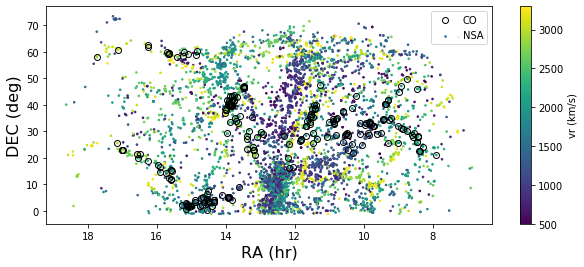

In [120]:
plt.figure(figsize=(10,4))
plt.scatter(nsasub.RA/15,nsasub.DEC,c=nsasub.Z*3.e5,s=10,marker='.',vmin=500,vmax=3300,label='NSA')

plt.plot(codat.RA/15.,codat.DEC,'ko',mfc='None',mec='k', label='CO')

plt.colorbar(label='vr (km/s)')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('../plots/NSA-CO.png')

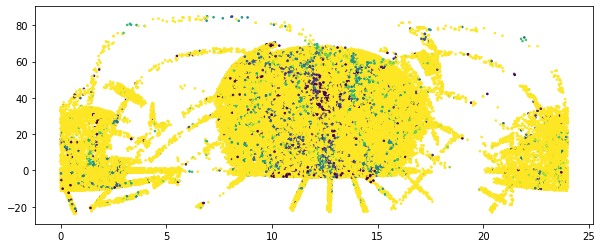

In [20]:
# checking to see what the full extent of NSA is
plt.figure(figsize=(10,4))
plt.scatter(nsa.RA/15,nsa.DEC,c=nsa.Z*3.e5,s=10,marker='.',vmin=500,vmax=3300,label='NSA')

## AGC ##

In [122]:
#agcfile = '/Users/rfinn/research/AGC/agcnorthminus1.2019Sep24.fits'
# got a new version from Martha on 11/19/19
agcfile = '/Users/rfinn/research/AGC/agcm1.sh191118.fits'
agc = fits.getdata(agcfile)

In [123]:
# create velocity that is VOPT if present, and V21 otherwise
voptflag = agc['VOPT'] > 1.
vbest = voptflag*agc['VOPT'] + ~voptflag*agc['V21']
#avflag1 = (agc['VOPT'] > vmin) & (agc['VOPT'] < vmax)
#avflag2 = (agc['V21'] > vmin) & (agc['V21'] < vmax)
avflag = (vbest > vmin) & (vbest < vmax)
raflag = (agc['radeg'] > ramin) & (agc['radeg'] < ramax) 
decflag = (agc['decdeg'] < decmax) & (agc['decdeg'] > decmin)
overlap = avflag & raflag & decflag

In [124]:
agcsub = agc[overlap]
vbestsub = vbest[overlap]

In [125]:
len(agcsub)

6512

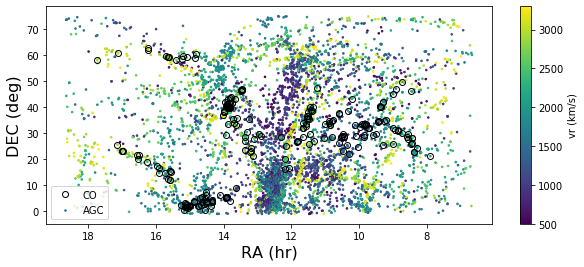

In [126]:
plt.figure(figsize=(10,4))
plt.scatter(agcsub['radeg']/15,agcsub['decdeg'],c=vbestsub,s=10,marker='.',vmin=500,vmax=3300,label='AGC')

plt.plot(codat.RA/15.,codat.DEC,'ko',mfc='None',mec='k', label='CO')

plt.colorbar(label='vr (km/s)')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('../plots/AGC-CO.png')

## Gianluca's Catalog ##



In [27]:
gl = fits.getdata('/Users/rfinn/research/VirgoFilaments/Gianluca/nsa_HyperLeda_NED_Steer2017dist_Virgo_field_sources_extension_H0_74_0_final_Kim2016corr_inclCOsample.fits')

In [29]:
gl.columns

ColDefs(
    name = 'mfir_HL'; format = 'D'
    name = 'hic_HL'; format = 'D'
    name = 'e_vt_HL'; format = 'D'
    name = 'MASS_nsa'; format = 'D'
    name = 'Z_nsa'; format = 'D'
    name = 'agnclass_HL'; format = '11A'
    name = 'ubtc_HL'; format = 'D'
    name = 't_HL'; format = 'D'
    name = 'objtype_HL'; format = '5A'
    name = 'pa_HL'; format = 'D'
    name = 'itc_HL'; format = 'D'
    name = 'vt_HL'; format = 'D'
    name = 'ra2000_HL'; format = 'D'
    name = 'ring_HL'; format = '11A'
    name = 'objname_HL'; format = '29A'
    name = 'e_it_HL'; format = 'D'
    name = 'Dall_err'; format = '755A'
    name = 'NEDname'; format = '30A'
    name = 'Dmedian'; format = 'D'
    name = 'multiple_HL'; format = '11A'
    name = 'e_ut_HL'; format = 'D'
    name = 'DEC_nsa'; format = 'D'
    name = 'btc_HL'; format = 'D'
    name = 'NED_nsa_as'; format = 'D'
    name = 'Dmin'; format = 'D'
    name = 'v_HL'; format = 'D'
    name = 'compactness_HL'; format = '11A'
    name = 'Dmax'; f

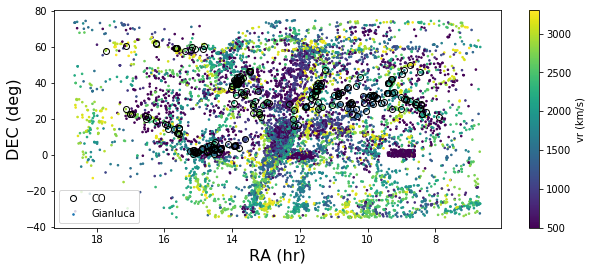

In [30]:
plt.figure(figsize=(10,4))
plt.scatter(gl['RA']/15,gl['DEC'],c=gl['v_HL'],s=10,marker='.',vmin=500,vmax=3300,label='Gianluca')

plt.plot(codat.RA/15.,codat.DEC,'ko',mfc='None',mec='k', label='CO')

plt.colorbar(label='vr (km/s)')
plt.legend()
plt.gca().invert_xaxis()
plt.xlabel('RA (hr)',fontsize=16)
plt.ylabel('DEC (deg)',fontsize=16)
plt.savefig('../plots/Gianluca-CO.png')

Text(0, 0.5, 'Number of Galaxies')

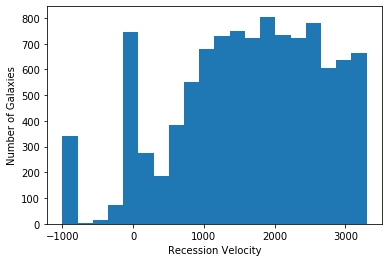

In [32]:
# histogram of velocities
plt.figure()
plt.hist(gl['v_HL'],bins=20)
plt.xlabel('Recession Velocity')
plt.ylabel('Number of Galaxies')

8777


Text(0, 0.5, 'Number of Galaxies')

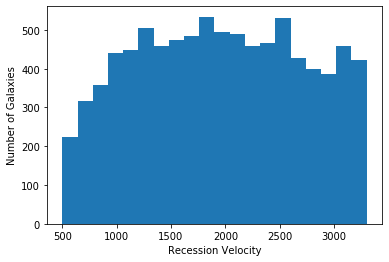

In [33]:
# histogram of velocities  - cut a 500 km/s
keepflag = gl['v_HL'] > 500.
glsub = gl[keepflag]
print(len(glsub))
plt.figure()
plt.hist(glsub['v_HL'],bins=20)
plt.xlabel('Recession Velocity')
plt.ylabel('Number of Galaxies')

# Comparison #

- 5690 Hyperleda sources
- 5606 NSA sources
- 6512 AGC sources

Now time to match

In [35]:
hyper = fhdat[vflag]
print(len(hyper))

5690


In [36]:
# adding redshifts for additional matching criteria
hcoord = SkyCoord(hyper['al2000']*u.hr,hyper['de2000']*u.deg,frame='icrs')
ncoord = SkyCoord(nsasub.RA*u.deg,nsasub.DEC*u.deg,frame='icrs')
acoord = SkyCoord(agcsub['radeg']*u.deg,agcsub['decdeg']*u.deg, frame='icrs')
gcoord = SkyCoord(glsub['RA']*u.deg, glsub['DEC']*u.deg, frame='icrs')

In [532]:
d1 = hyper['vopt']*u.km/u.s/cosmo.H(0)
dHL = d1.to('Mpc')
dNSA = (nsasub.Z*3.e5*u.km/u.s/cosmo.H(0)).to('Mpc')
dAGC = (vbestsub*u.km/u.s/cosmo.H(0)).to('Mpc')
print(sum(dHL < 0))
print(sum(dNSA < 0))
print(sum(dAGC < 0))

0
0
0


In [534]:
# adding redshifts for additional matching criteria

hcoord = SkyCoord(hyper['al2000']*u.hr,hyper['de2000']*u.deg,distance=dHL,frame='icrs')
ncoord = SkyCoord(nsasub.RA*u.deg,nsasub.DEC*u.deg,distance=dNSA,frame='icrs')
acoord = SkyCoord(agcsub['radeg']*u.deg,agcsub['decdeg']*u.deg, distance=dAGC,frame='icrs')

In [37]:
# match NSA to Hyperleda
insa, d2d, d3d = hcoord.match_to_catalog_3d(ncoord)
# first look at number with match w/in 10"
matchflag = d2d < 10./3600*u.deg
print('number of matches w/in 10 arcsec = ',sum(matchflag),'/',len(matchflag))

number of matches w/in 10 arcsec =  4461 / 5690


In [38]:
# match NSA to Hyperleda
iagc, agcd2d, agcd3d = hcoord.match_to_catalog_3d(acoord)
# first look at number with match w/in 10"
agc_matchflag = agcd2d < 10./3600*u.deg
print('number of matches w/in 10 arcsec = ',sum(agc_matchflag),'/',len(agc_matchflag))

number of matches w/in 10 arcsec =  4956 / 5690


### Plot distribution of angular separations between Hyperleda source and closed NSA source ###

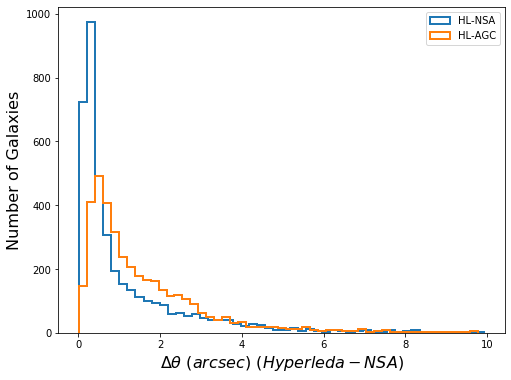

In [537]:
plt.figure(figsize=(8,6))
t=plt.hist(d2d.to('arcsec').value[matchflag],lw=2,histtype='step',bins=50,label='HL-NSA')
t=plt.hist(agcd2d.to('arcsec').value[agc_matchflag],lw=2,histtype='step',bins=50,label='HL-AGC')
plt.xlabel(r'$ \Delta \theta \ (arcsec) \ (Hyperleda- NSA)$',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.legend()
plt.savefig('../plots/hyperlead-nsa-offsets.png')

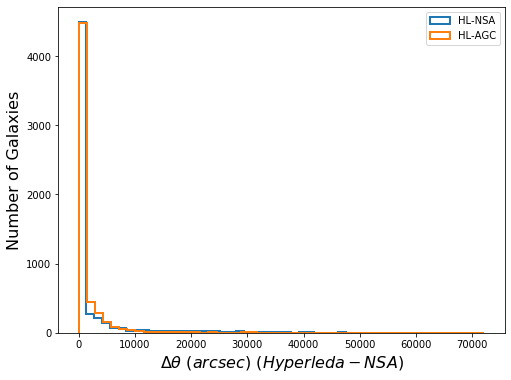

In [538]:
plt.figure(figsize=(8,6))
#t=plt.hist(d2d.to('arcsec').value,bins=50)
t=plt.hist(d2d.to('arcsec').value,lw=2,histtype='step',bins=50,label='HL-NSA')
t=plt.hist(agcd2d.to('arcsec').value,lw=2,histtype='step',bins=50,label='HL-AGC')
plt.xlabel(r'$ \Delta \theta \ (arcsec) \ (Hyperleda- NSA)$',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.legend()
plt.savefig('../plots/hyperlead-nsa-offsets-all.png')

In [392]:
# print out NSAID for d2d > 15"
flag = (d2d.to('arcsec').value < 15.) & (d2d.to('arcsec').value > 10.)
nsaindex = insa[flag]
print(len(nsa.NSAID[nsaindex]))
ascii.write([nsa.RA[nsaindex],nsa.DEC[nsaindex]], 'nsa-bigoffset.tbl', format='ipac',names=['RA','DEC'],overwrite=True)  
ascii.write([hcoord.ra.deg[flag],hcoord.dec.deg[flag]], 'hyperleda-offset-10-15.tbl', format='ipac',names=['RA','DEC'],overwrite=True)  

67


## Plot 3D Distances between HL and (NSA, AGC) ##

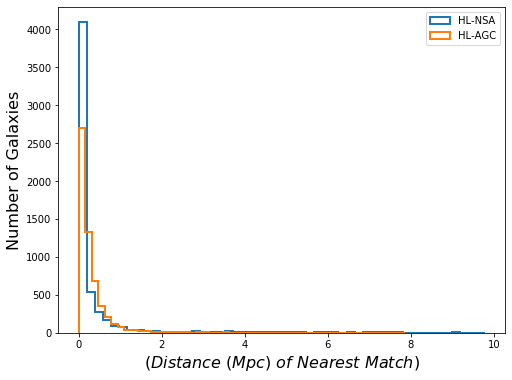

In [659]:
plt.figure(figsize=(8,6))
#t=plt.hist(d2d.to('arcsec').value,bins=50)
t=plt.hist((d3d.value[d3d<10*u.Mpc]),lw=2,histtype='step',bins=50,label='HL-NSA')
t=plt.hist((agcd3d.value[agcd3d < 10*u.Mpc]),lw=2,histtype='step',bins=50,label='HL-AGC')
plt.xlabel(r'$(Distance \ (Mpc) \ of \ Nearest \ Match) $',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.legend()
plt.savefig('../plots/hyperlead-nsa-offsets-3d-all.png')

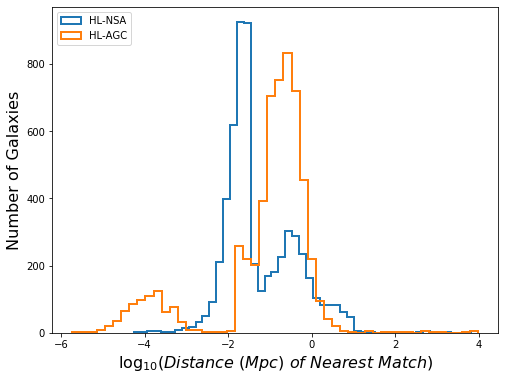

In [546]:
plt.figure(figsize=(8,6))
#t=plt.hist(d2d.to('arcsec').value,bins=50)
t=plt.hist(np.log10(d3d.value),lw=2,histtype='step',bins=50,label='HL-NSA')
t=plt.hist(np.log10(agcd3d.value),lw=2,histtype='step',bins=50,label='HL-AGC')
plt.xlabel(r'$ \log_{10}(Distance \ (Mpc) \ of \ Nearest \ Match) $',fontsize=16)
plt.ylabel('Number of Galaxies',fontsize=16)
plt.legend()
plt.savefig('../plots/hyperlead-nsa-offsets-log3d-all.png')

In [539]:
d3d

<Quantity [0.01993597, 0.24577929, 0.02513129, ..., 0.00789993, 0.00540257,
           0.03014634] Mpc>

# Hyperleda Catalog #

In [394]:
hyper

<Table masked=True length=5690>
        objname         objtype  de2000   al2000  ...   e_ut    e_vt  </strong>
         str28            str1  float64  float64  ... float64 float64   int64  
----------------------- ------- -------- -------- ... ------- ------- ---------
              PGC214313       G -0.74417 14.66562 ...   0.031      --        --
             PGC1137065       G -0.69235 12.08394 ...    0.04      --        --
             PGC1125203       G   -1.164 11.04396 ...   0.027      --        --
             PGC1125333       G -1.15839   8.9659 ...      --      --        --
             PGC1133411       G -0.83844 11.39586 ...      --      --        --
             PGC1143249       G -0.44049 12.71758 ...      --      --        --
             PGC1143397       G -0.43431   9.7746 ...   0.019      --        --
             PGC1145176       G -0.36432 13.28684 ...      --      --        --
             PGC1146040       G -0.32922 16.79977 ...      --      --        --
             PGC1150193       G -0.16787 12.87613 ...   0.049      --        --
                    ...     ...      ...      ... ...     ...     ...       ...
SDSSJ114706.99+030623.0       G   3.1064 11.78528 ...   0.096      --        --
SDSSJ114711.93+585508.7       G 58.91916 11.78665 ...   0.096      --        --
             PGC2093798       G 37.13975 11.79529 ...   0.054      --        --
              PGC036801       G 59.88664 11.79591 ...    0.02      --        --
SDSSJ114754.72+582151.3       G 58.36423 11.79854 ...   0.066      --        --
             PGC2585171       G 58.99303 11.79913 ...   0.116      --        --
SDSSJ114759.03+100825.8       G 10.14049 11.79974 ...    0.24      --        --
SDSSJ114829.31+570754.9       G 57.13193 11.80814 ...   0.033      --        --
             PGC2300734       G 47.58268 11.81541 ...   0.053      --        --
SDSSJ114912.46+611140.4       G 61.19465 11.82013 ...   0.199      --        --

## Display Images of Offsets ##

- make figure with color image cutout
- mark position of NSA object
- mark position of Hyperleda

### 2019-Nov-25 ###
- going to add positions from Gianluca's catalog to see if he has issues with galaxies being split into multiple sources
- datafile = '/Users/rfinn/research/VirgoFilaments/Gianluca/nsa_HyperLeda_NED_Steer2017dist_Virgo_field_sources_extension_H0_74_0_final_Kim2016corr_inclCOsample.fits'



In [127]:
def getlegacy(ra1,dec1,ra2=None,dec2=None, ra3=None,dec3=None,agcflag=False):
    #url='http://legacysurvey.org/viewer/fits-cutout?ra='+str(ra1)+'&dec='+str(dec1)+'&layer=mzls+bass-dr6&pixscale=0.27&bands=r'
    url='http://legacysurvey.org/viewer/cutout.fits?ra='+str(ra1)+'&dec='+str(dec1)+'&layer=dr8&pixscale=1.00'
    #http://legacysurvey.org/viewer/cutout.fits?ra=156.2778&dec=28.0920&layer=dr8&pixscale=1.00
    #print(url)
    fname = 'hyper-nsa-test.fits'
    urlretrieve(url, fname)
    t,h = fits.getdata(fname,header=True)
    # write out r-band image
    # nevermind - John M figured out how to use MEF with WCS
    #fits.writeto('r-test.fits',t[1],header=h,overwrite=True)
    norm = simple_norm(t[1],stretch='asinh',percent=99.5)
    plt.imshow(t[1],origin='upper',cmap='gray_r', norm=norm)
    dx=20
    if agcflag:
        colors = ['cyan','blue','red']
    else:
        colors = ['red','blue','cyan']
    if (ra2 is not(None)) & (ra3 is not(None)):
        ra = np.array([ra1,ra2, ra3])
        dec = np.array([dec1,dec2, dec3])   
        #w = WCS('r-test.fits')
        #px,py = w.wcs_world2pix(ra,dec)
        w = WCS('hyper-nsa-test.fits',naxis=2)
        px,py = w.wcs_world2pix(ra,dec,1)
        #print(px,py)
        r1 = Rectangle((px[0]-dx/2, py[0]-dx/2), dx, dx, edgecolor=colors[0], facecolor='none')
        dx=17.5
        r2 = Rectangle((px[1]-dx/2, py[1]-dx/2), dx, dx, edgecolor=colors[1], facecolor='none')
        dx=15
        r3 = Rectangle((px[2]-dx/2, py[2]-dx/2), dx, dx, edgecolor=colors[2], facecolor='none')
        plt.gca().add_patch(r1)
        plt.gca().add_patch(r2)
        plt.gca().add_patch(r3)
        return w
        

In [130]:
def add_allgals(w,agcflag=False):
    cats = [acoord, ncoord, hcoord,gcoord]
    symbols=['co','b*','r+','kD']
    edgecolors = ['c','w','r','xkcd:goldenrod']
    if agcflag:
        facecolors = ['None','b','r','None']
    else:
        facecolors = ['c','b','r','None']
    sizes = [10,14,14,20]
    
    w = WCS('hyper-nsa-test.fits',naxis=2)
    for i,c in enumerate(cats):
        px,py = w.wcs_world2pix(c.ra.deg,c.dec.deg,1)
        plt.plot(px,py,symbols[i],mec=edgecolors[i],mfc=facecolors[i],markersize=sizes[i])

    

In [131]:
def plotimages(dmin,dmax,d2d=None,agcflag=False):
    flag = (d2d.to('arcsec').value < dmax) & (d2d.to('arcsec').value > dmin)
    nsaindex = insa[flag]
    agcindex = iagc[flag]
    hra1 = hcoord.ra.deg[flag]
    hdec1 = hcoord.dec.deg[flag]
    nra2 = nsasub.RA[nsaindex]
    ndec2 = nsasub.DEC[nsaindex]
    ara3 = agcsub['radeg'][agcindex]
    adec3 = agcsub['decdeg'][agcindex]
    hlname = hyper['objname'][flag]
    nsaid = nsasub.NSAID[nsaindex]
    agcnumber = agcsub['AGCnr'][agcindex]
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(bottom=.05,left=.05,top=.9,right=.95,hspace=.3)
    for i in range(9):
        plt.subplot(3,3,i+1)
        if agcflag:
            w = getlegacy(ara3[i],adec3[i],ra2=nra2[i],dec2=ndec2[i],ra3=hra1[i],dec3=hdec1[i],agcflag=agcflag)
        else:
            w = getlegacy(hra1[i],hdec1[i],ra2=nra2[i],dec2=ndec2[i],ra3=ara3[i],dec3=adec3[i],agcflag=agcflag)
        plt.axis([50,200,50,200])
        plt.title(str(hlname[i])+'\n NSA '+str(nsaid[i])+' / AGC '+str(agcnumber[i]))
        if i == 1:
            plt.text(0, 235,'HL-NSA Coords:'+str(dmin)+'-'+str(dmax)+' arcsec',fontsize=16)
        add_allgals(w)
    plt.savefig('../plots/HL-NSA-'+str(dmin)+'-'+str(dmax)+'.png')

In [132]:
def plotimagesagc(dmin,dmax,agcflag=True):
    flag = (d2d_h2a.to('arcsec').value < dmax) & (d2d_h2a.to('arcsec').value > dmin)
    nsaindex = insa_n2a[flag]
    hyperindex = ihyper_h2a[flag]
    hra1 = hcoord.ra.deg[hyperindex]
    hdec1 = hcoord.dec.deg[hyperindex]
    nra2 = nsasub.RA[nsaindex]
    ndec2 = nsasub.DEC[nsaindex]
    ara3 = agcsub['radeg'][flag]
    adec3 = agcsub['decdeg'][flag]
    w21 = agcsub['width'][flag]
    hlname = hyper['objname'][hyperindex]
    nsaid = nsasub.NSAID[nsaindex]
    agcnumber = agcsub['AGCnr'][flag]
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(bottom=.05,left=.05,top=.9,right=.95,hspace=.3)
    for i in range(9):
        try:
            plt.subplot(3,3,i+1)
            if agcflag:
                w = getlegacy(ara3[i],adec3[i],ra2=nra2[i],dec2=ndec2[i],ra3=hra1[i],dec3=hdec1[i],agcflag=agcflag)
            else:
                w = getlegacy(hra1[i],hdec1[i],ra2=nra2[i],dec2=ndec2[i],ra3=ara3[i],dec3=adec3[i],agcflag=agcflag)
            plt.axis([50,200,50,200])
            plt.title(str(hlname[i])+'\n NSA '+str(nsaid[i])+' / AGC '+str(agcnumber[i]))
            if i == 1:
                plt.text(0, 235,'HL match to AGC:'+str(dmin)+'-'+str(dmax)+' arcsec',fontsize=16)
            add_allgals(w, agcflag=agcflag)
            if w21[i] > .1:
                plt.text(75, 60,'W21='+str(w21[i]),fontsize=12)
        except IndexError:
            break
    plt.savefig('../plots/AGC-HL-NSA-'+str(dmin)+'-'+str(dmax)+'.png')

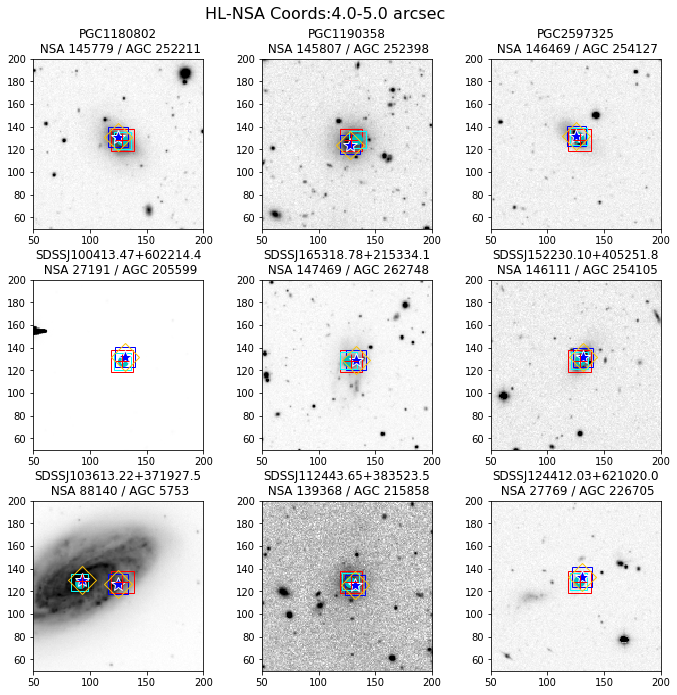

In [133]:
dmin=4.
dmax=5.
plotimages(dmin,dmax,d2d=d2d)

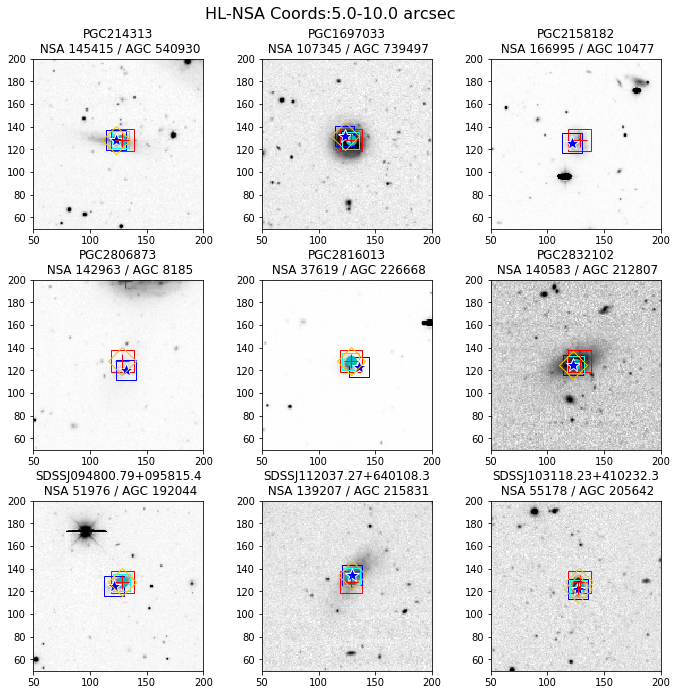

In [134]:
dmin=5.
dmax=10.
plotimages(dmin,dmax,d2d=d2d)

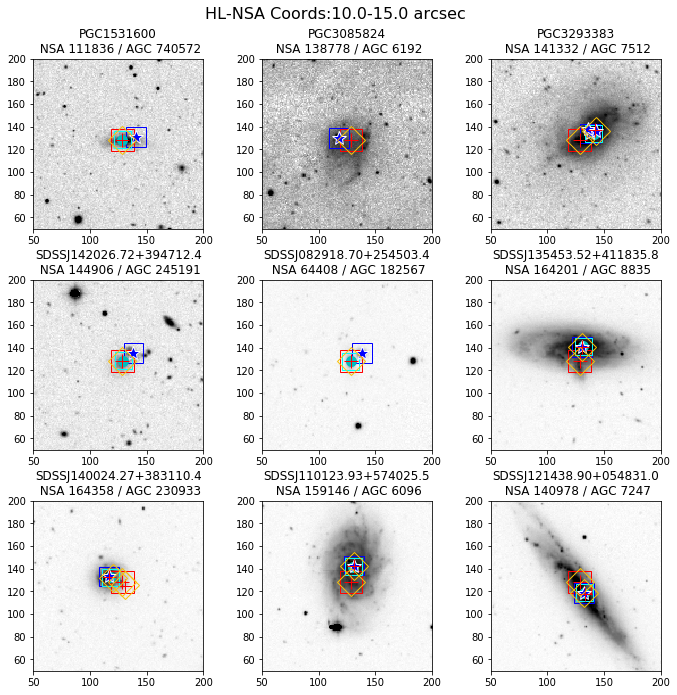

In [135]:
dmin=10.
dmax=15.
plotimages(dmin,dmax,d2d=d2d)

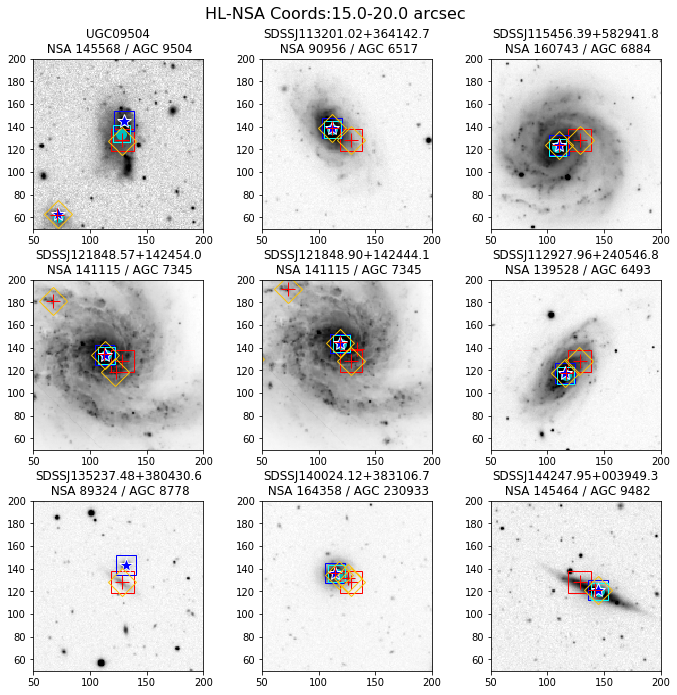

In [136]:
dmin=15.
dmax=20.
plotimages(dmin,dmax,d2d=d2d)

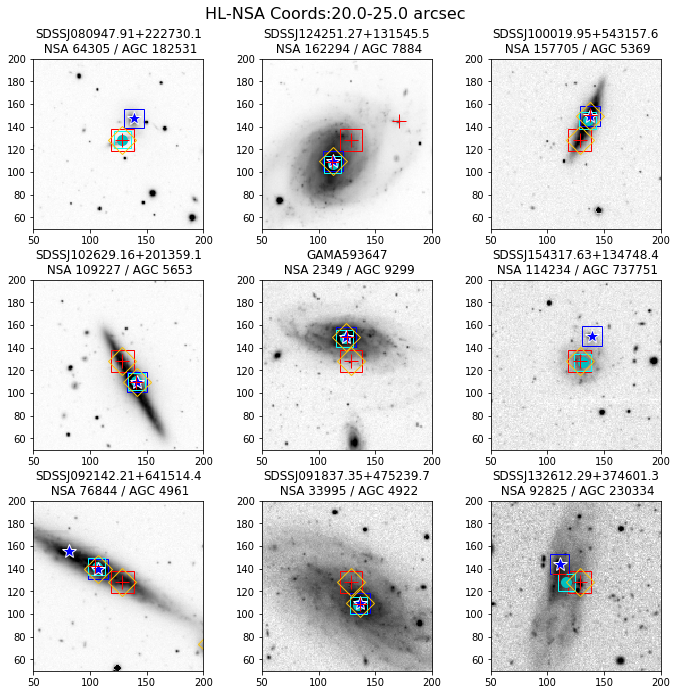

In [137]:
dmin=20.
dmax=25.
plotimages(dmin,dmax,d2d=d2d)

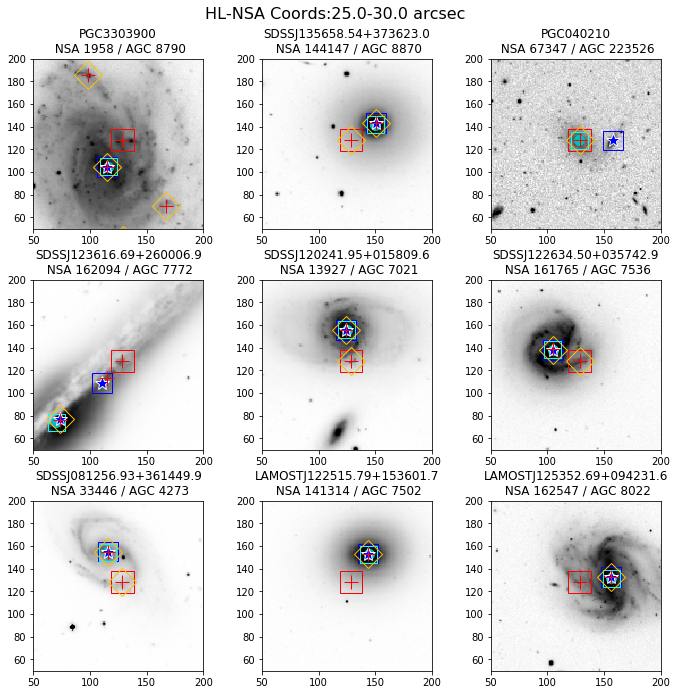

In [138]:
dmin=25.
dmax=30.
plotimages(dmin,dmax,d2d=d2d)

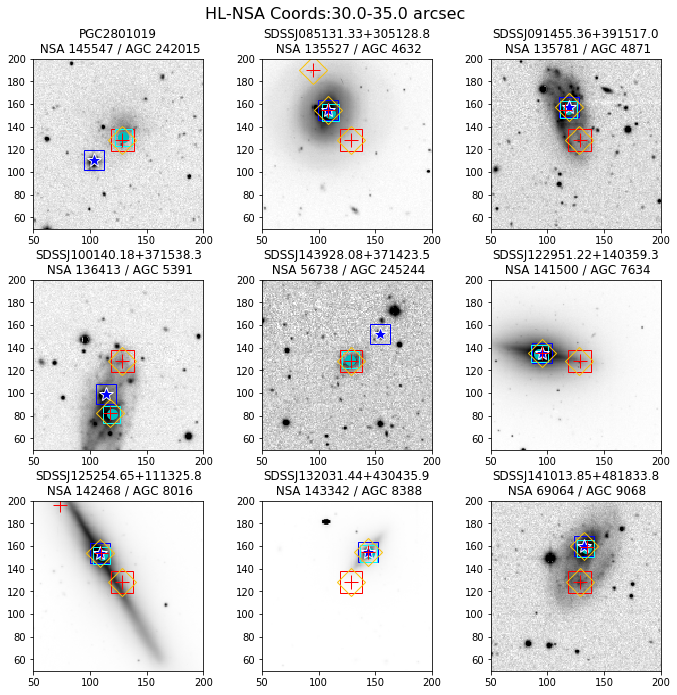

In [139]:
dmin=30.
dmax=35.
plotimages(dmin,dmax,d2d=d2d)

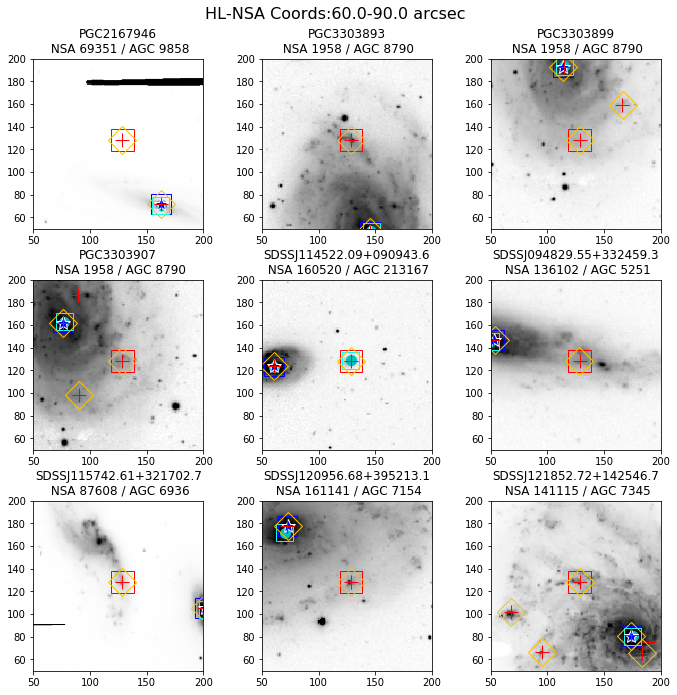

In [140]:
dmin=60.
dmax=90.
plotimages(dmin,dmax,d2d=d2d)

# Match Hyperleda to AGC #

In [ ]:
# match NSA to AGC
insa_n2a, d2d_n2a, d3d_n2a = acoord.match_to_catalog_sky(ncoord)
# first look at number with match w/in 10"
matchflag_n2a = d2d_n2a < 10./3600*u.deg
print('number of matches w/in 10 arcsec = ',sum(matchflag_n2a),'/',len(matchflag_n2a))

In [ ]:
# match NSA to AGC
ihyper_h2a, d2d_h2a, d3d_h2a = acoord.match_to_catalog_sky(hcoord)
# first look at number with match w/in 10"
matchflag_h2a = d2d_h2a < 10./3600*u.deg
print('number of matches w/in 10 arcsec = ',sum(matchflag_h2a),'/',len(matchflag_h2a))

In [ ]:
dmin=5.
dmax=10.
plotimagesagc(dmin,dmax,agcflag=True)

In [ ]:
dmin=5.
dmax=10.
plotimagesagc(dmin,dmax,agcflag=True)

In [ ]:
dmin=10.
dmax=15.
plotimagesagc(dmin,dmax,agcflag=True)

In [ ]:
dmin=15.
dmax=20.
plotimagesagc(dmin,dmax,agcflag=True)

In [ ]:
dmin=20.
dmax=30.
plotimagesagc(dmin,dmax,agcflag=True)

In [ ]:
dmin=30.
dmax=50.
plotimagesagc(dmin,dmax,agcflag=True)

In [ ]:
dmin=50.
dmax=100.
plotimagesagc(dmin,dmax,agcflag=True)

### What have we learned? ###

- probably need to check by eye any source that doesn't have a match in another catalog w/in 5 arcsec


## Playing with Legacy Viewer ##

[50, 200, 50, 200]

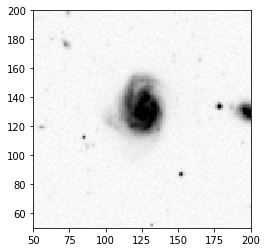

In [369]:
url = 'http://legacysurvey.org/viewer/fits-cutout?ra=154.7709&dec=46.4537&layer=mzls+bass-dr6&pixscale=0.27&bands=grz'
getlegacy(154.7709,46.4537)
plt.axis([50,200,50,200])

# Moving Toward a Final Sample #

We need to make one list of all known objects in the vicinity of clusters.  Here is a potential procedure for creating this list (Rose and Benedetta talked about this after meeting) - Rose will try to implement for next week:

- start with HL - match to NSA and AGC
- consider all matches with offsets less than 5" to be the same galaxy
  - track NSA and AGC names of matches
- add HL objects with closest match > 5"
- match remaining AGC and NSA
- consider all matches with offsets less than 5" to be the same galaxy
- list NSA name, track AGC name of match
- add remaining NSA galaxies with no HL and no AGC within 5"
- add remaining AGC galaxies with no HL and no NSA within 5"

Writing code in create-super-sample.py

https://github.com/rfinn/Virgo/blob/master/programs/create-super-sample.py





In [5]:
os.chdir('/Users/rfinn/research/VirgoFilaments/super-sample')

In [63]:
%run ~/github/Virgo/programs/create-super-sample.py 

I am trying two methods for matching.  The first method uses the procedure outlined above.

In [64]:
s.run_it(maxoffset=5)

MATCHING NSA TO HYPERLEDA
number of matches w/in  5  arcsec =  5081 / 6863
MATCHING AGC TO HYPERLEDA
number of matches w/in  5  arcsec =  5822 / 6863
MATCHING NSA TO AGC
number of matches w/in  5  arcsec =  4721 / 6504

number of AGC sources matched to either HL or AGC =   5911
6863 99 593 482
total number of galaxies in sample =  8037
METHOD 1
checking HL  HL  name
number of duplicates =  0
checking HL  AGC  name
number of duplicates =  10
checking HL  NSA  name
number of duplicates =  44


This produces some double entries of AGC and NSA galaxies.  

Still thinking about what this means - must mean the 

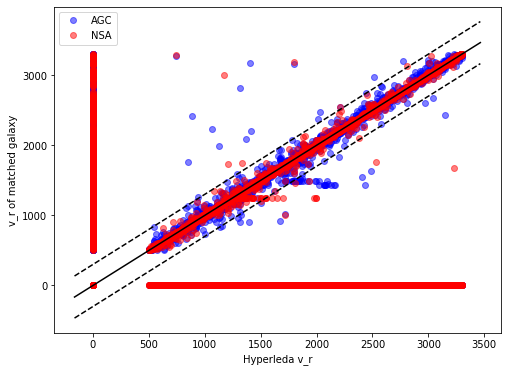

In [65]:
s.check_vel()

The second method uses code I developed for ALFALFA-related work.

In theory, this should yield similar results...

In [66]:
s.get_smart(maxoffset=5)

METHOD 2: AFTER FIRST MERGE
checking HL  HL  name
checking HL  AGC  name
METHOD 2
checking HL  HL  name
number of duplicates =  0
checking HL  AGC  name
number of duplicates =  10
checking HL  NSA  name
number of duplicates =  43


In [67]:
print(len(s.table2))
print('number in HL =',sum(s.table2['HLflag']))
print('number in AGC = ',sum(s.table2['AGCflag']))
print('number in NSA = ',sum(s.table2['NSAflag']))

8095
number in HL = 6863
number in AGC =  6514
number in NSA =  5719


In [68]:
print(len(s.sample_table))
print('number in HL =',sum(s.sample_table['HLflag']))
print('number in AGC = ',sum(s.sample_table['AGCflag']))
print('number in NSA = ',sum(s.sample_table['NSAflag']))

8037
number in HL = 6863
number in AGC =  6514
number in NSA =  5662


In [70]:
# starting sample sizes
print('total HL galaxies = ',len(s.hl))
print('total AGC galaxies = ',len(s.agc))
print('total NSA galaxies = ',len(s.nsa))

total HL galaxies =  6863
total AGC galaxies =  6504
total NSA galaxies =  5675


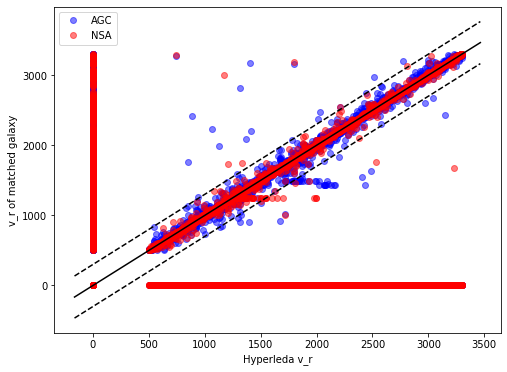

In [69]:
s.check_vel(table2flag=True)

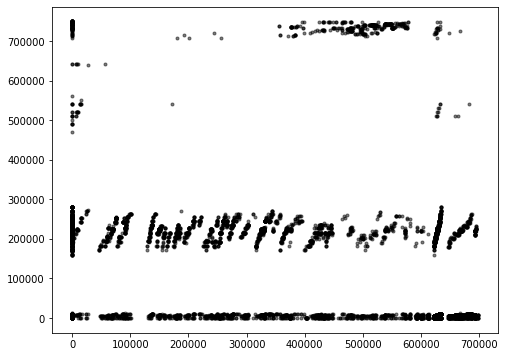

In [72]:
plt.figure(figsize=(8,6))
mytable=s.sample_table
plt.plot(mytable['NSA_name'],mytable['AGC_name'],'k.',alpha=.5)